In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset, random_split
import torchvision.datasets as datasets
import os
%matplotlib inline

/home/ddsukhoverkhova/.conda/envs/mc_lib_env/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
plt.rcParams['axes.grid'] = True

In [4]:
roots = [2.2691853142129728, 2.104982167992544, 1.932307699120554, 1.749339162933206, 1.5536238493280832, 1.34187327905057, 1.109960313758399, 0.8541630993606272, 0.5762735442012712, 0.2885386111960936, 0.03198372863548067]
jds = [0.0, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9, -1.0]
get_crit_T = dict(zip(jds, roots))

In [95]:
Jd = 0.0

num_temps = 20
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_10 = np.load(f)
    
L = 20
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_80 = np.load(f)

In [96]:
def errs(errs):
    return np.array([sum(errs[i*512:(i+1)*512])/512 for i in range(num_temps)])

def stds_err(errs):
    return np.array([np.std(errs[i*512:(i+1)*512]) for i in range(num_temps)])

In [129]:
'''fig, ax = plt.subplots(3, 1, figsize=(10,10))

ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='o', label='L=10')
ax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='o', label='L=20')
ax[0].errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='o', label='L=30')
ax[0].errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='o', label='L=60')
ax[0].errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='o', label='L=80')

ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='o')
ax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='o')
ax[1].errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='o')
ax[1].errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='o')
ax[1].errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='o')

ax[2].plot(T, stds_err(outs_10), marker='o')
ax[2].plot(T, stds_err(outs_20), marker='o')
ax[2].plot(T, stds_err(outs_30), marker='o')
ax[2].plot(T, stds_err(outs_60), marker='o')
ax[2].plot(T, stds_err(outs_80), marker='o')

ax[0].axvline(x=T_c, color='black')
ax[1].axvline(x=T_c, color='black')
ax[2].axvline(x=T_c, color='black')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title='Jd = 0.0')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()'''

"fig, ax = plt.subplots(3, 1, figsize=(10,10))\n\nax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='o', label='L=10')\nax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='o', label='L=20')\nax[0].errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='o', label='L=30')\nax[0].errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='o', label='L=60')\nax[0].errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='o', label='L=80')\n\nax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='o')\nax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='o')\nax[1].errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='o')\nax[1].errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='o')\nax[1].errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='o')\n\nax[2].plot(T, stds_err(outs_10), marker='o')\nax[2].plot(T, stds_err(outs_20), marker='o')\nax[2].plot(T, stds_err(outs_30), m

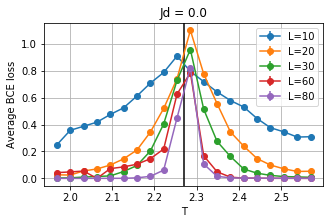

In [100]:
plt.errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='o', label='L=10')
plt.errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='o', label='L=20')
plt.errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='o', label='L=30')
plt.errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='o', label='L=60')
plt.errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='o', label='L=80')

#plt.rcParams["figure.figsize"] = (10,6)

plt.title('Jd = 0.0')
plt.xlabel('T')
plt.ylabel('Average BCE loss')
plt.axvline(x=T_c, color='black')
plt.legend()

plt.savefig('images/00_20_bce.png')

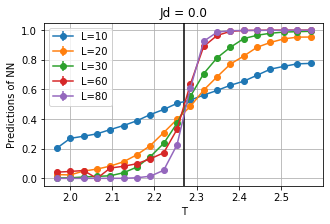

In [101]:
plt.errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='o', label='L=10')
plt.errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='o', label='L=20')
plt.errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='o', label='L=30')
plt.errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='o', label='L=60')
plt.errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='o', label='L=80')

plt.title('Jd = 0.0')
plt.xlabel('T')
plt.ylabel('Predictions of NN')
plt.axvline(x=T_c, color='black')
plt.legend()

plt.savefig('images/00_20_pred.png')

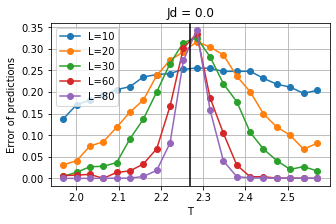

In [102]:
plt.plot(T, stds_err(outs_10), marker='o', label='L=10')
plt.plot(T, stds_err(outs_20), marker='o', label='L=20')
plt.plot(T, stds_err(outs_30), marker='o', label='L=30')
plt.plot(T, stds_err(outs_60), marker='o', label='L=60')
plt.plot(T, stds_err(outs_80), marker='o', label='L=80')

plt.title('Jd = 0.0')
plt.xlabel('T')
plt.ylabel('Error of predictions')
plt.axvline(x=T_c, color='black')
plt.legend()

plt.savefig('images/00_20_ep.png')

In [103]:
######## -0.3 ########

In [104]:
Jd = -0.3

num_temps = 20
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_10 = np.load(f)
    
L = 20
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_80 = np.load(f)

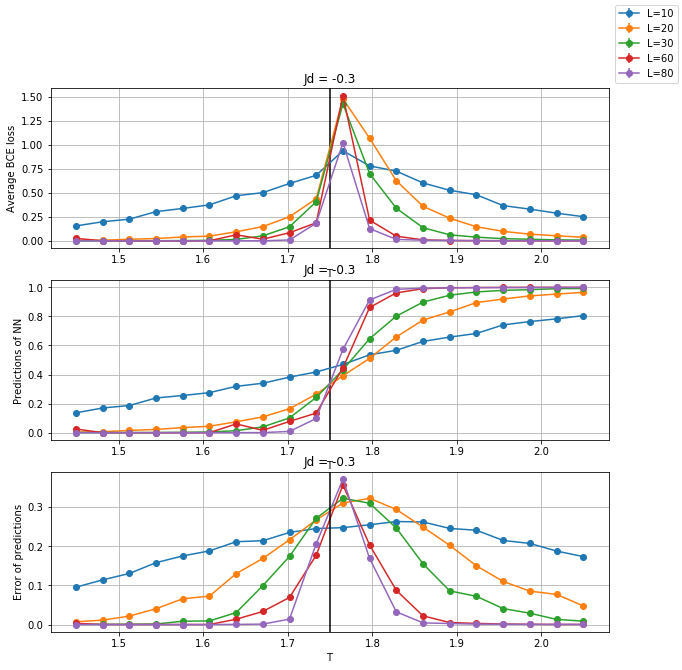

In [105]:
fig, ax = plt.subplots(3, 1, figsize=(10,10))

ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='o', label='L=10')
ax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='o', label='L=20')
ax[0].errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='o', label='L=30')
ax[0].errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='o', label='L=60')
ax[0].errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='o', label='L=80')

ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='o')
ax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='o')
ax[1].errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='o')
ax[1].errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='o')
ax[1].errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='o')

ax[2].plot(T, stds_err(outs_10), marker='o')
ax[2].plot(T, stds_err(outs_20), marker='o')
ax[2].plot(T, stds_err(outs_30), marker='o')
ax[2].plot(T, stds_err(outs_60), marker='o')
ax[2].plot(T, stds_err(outs_80), marker='o')

ax[0].axvline(x=T_c, color='black')
ax[1].axvline(x=T_c, color='black')
ax[2].axvline(x=T_c, color='black')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title='Jd = -0.3')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

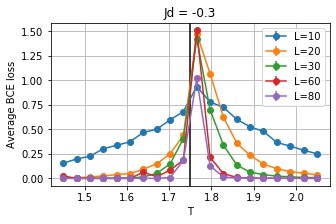

In [106]:
plt.errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='o', label='L=10')
plt.errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='o', label='L=20')
plt.errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='o', label='L=30')
plt.errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='o', label='L=60')
plt.errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='o', label='L=80')

plt.title('Jd = -0.3')
plt.xlabel('T')
plt.ylabel('Average BCE loss')
plt.axvline(x=T_c, color='black')
plt.legend()

plt.savefig('images/03_20_bce.png')

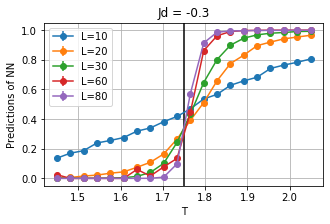

In [107]:
plt.errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='o', label='L=10')
plt.errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='o', label='L=20')
plt.errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='o', label='L=30')
plt.errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='o', label='L=60')
plt.errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='o', label='L=80')

plt.title('Jd = -0.3')
plt.xlabel('T')
plt.ylabel('Predictions of NN')
plt.axvline(x=T_c, color='black')
plt.legend()

plt.savefig('images/03_20_pred.png')

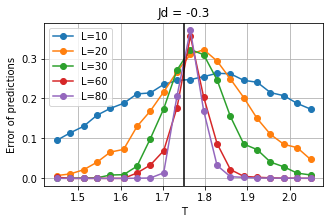

In [108]:
plt.plot(T, stds_err(outs_10), marker='o', label='L=10')
plt.plot(T, stds_err(outs_20), marker='o', label='L=20')
plt.plot(T, stds_err(outs_30), marker='o', label='L=30')
plt.plot(T, stds_err(outs_60), marker='o', label='L=60')
plt.plot(T, stds_err(outs_80), marker='o', label='L=80')

plt.title('Jd = -0.3')
plt.xlabel('T')
plt.ylabel('Error of predictions')
plt.axvline(x=T_c, color='black')
plt.legend()

plt.savefig('images/03_20_ep.png')

In [74]:
######## -0.5 #########

In [138]:
Jd = -0.5

num_temps = 20
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_10 = np.load(f)
    
L = 20
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_80 = np.load(f)

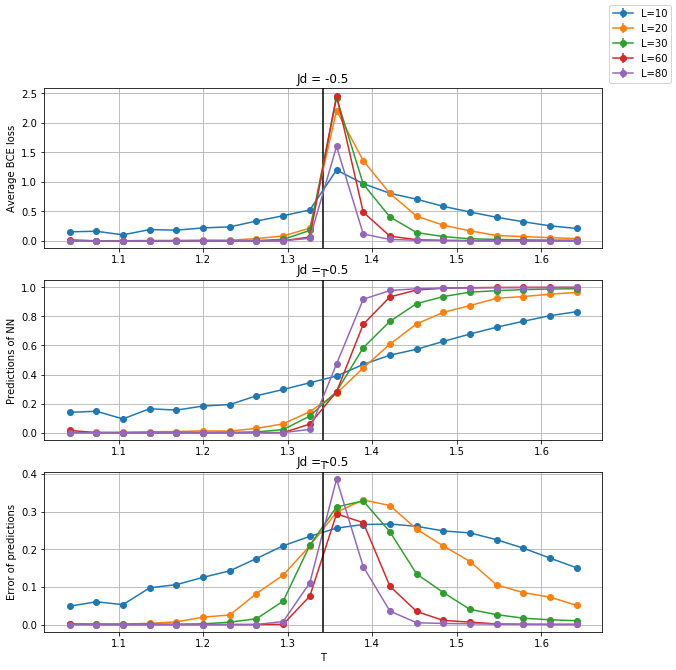

In [139]:
fig, ax = plt.subplots(3, 1, figsize=(10,10))

ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='o', label='L=10')
ax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='o', label='L=20')
ax[0].errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='o', label='L=30')
ax[0].errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='o', label='L=60')
ax[0].errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='o', label='L=80')

ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='o')
ax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='o')
ax[1].errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='o')
ax[1].errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='o')
ax[1].errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='o')

ax[2].plot(T, stds_err(outs_10), marker='o')
ax[2].plot(T, stds_err(outs_20), marker='o')
ax[2].plot(T, stds_err(outs_30), marker='o')
ax[2].plot(T, stds_err(outs_60), marker='o')
ax[2].plot(T, stds_err(outs_80), marker='o')

ax[0].axvline(x=T_c, color='black')
ax[1].axvline(x=T_c, color='black')
ax[2].axvline(x=T_c, color='black')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title='Jd = -0.5')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

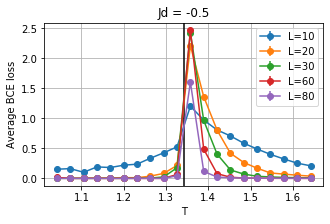

In [140]:
plt.errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='o', label='L=10')
plt.errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='o', label='L=20')
plt.errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='o', label='L=30')
plt.errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='o', label='L=60')
plt.errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='o', label='L=80')

plt.title('Jd = -0.5')
plt.xlabel('T')
plt.ylabel('Average BCE loss')
plt.axvline(x=T_c, color='black')
plt.legend()

plt.savefig('images/05_20_bce.png')

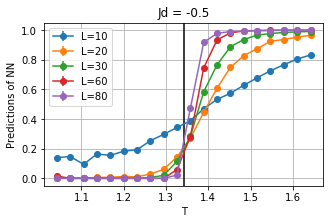

In [141]:
plt.errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='o', label='L=10')
plt.errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='o', label='L=20')
plt.errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='o', label='L=30')
plt.errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='o', label='L=60')
plt.errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='o', label='L=80')

plt.title('Jd = -0.5')
plt.xlabel('T')
plt.ylabel('Predictions of NN')
plt.axvline(x=T_c, color='black')
plt.legend()

plt.savefig('images/05_20_pred.png')

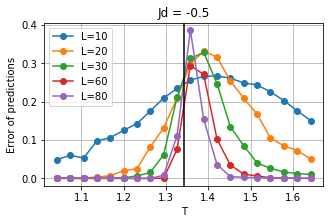

In [142]:
plt.plot(T, stds_err(outs_10), marker='o', label='L=10')
plt.plot(T, stds_err(outs_20), marker='o', label='L=20')
plt.plot(T, stds_err(outs_30), marker='o', label='L=30')
plt.plot(T, stds_err(outs_60), marker='o', label='L=60')
plt.plot(T, stds_err(outs_80), marker='o', label='L=80')

plt.title('Jd = -0.5')
plt.xlabel('T')
plt.ylabel('Error of predictions')
plt.axvline(x=T_c, color='black')
plt.legend()

plt.savefig('images/05_20_ep.png')

In [114]:
####### -0.7 ########

In [130]:
Jd = -0.7

num_temps = 20
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_10 = np.load(f)
    
L = 20
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_80 = np.load(f)

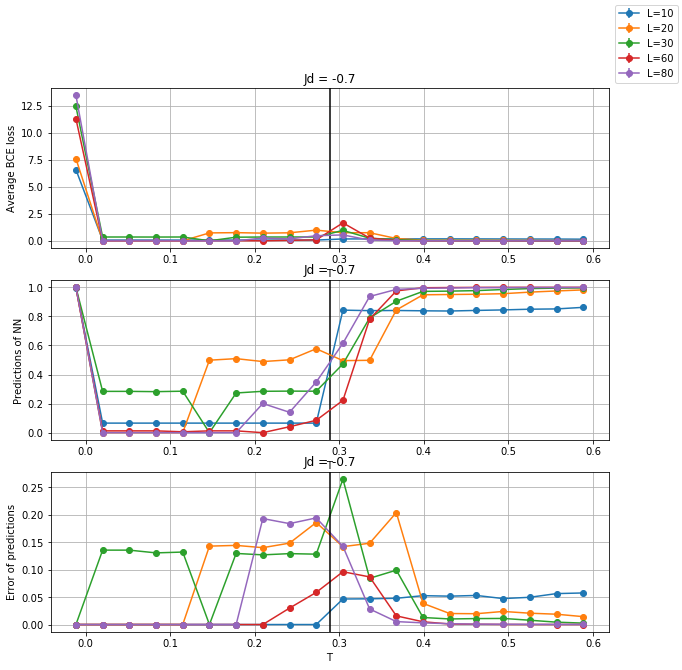

In [126]:
fig, ax = plt.subplots(3, 1, figsize=(10,10))

ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='o', label='L=10')
ax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='o', label='L=20')
ax[0].errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='o', label='L=30')
ax[0].errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='o', label='L=60')
ax[0].errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='o', label='L=80')

ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='o')
ax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='o')
ax[1].errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='o')
ax[1].errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='o')
ax[1].errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='o')

ax[2].plot(T, stds_err(outs_10), marker='o')
ax[2].plot(T, stds_err(outs_20), marker='o')
ax[2].plot(T, stds_err(outs_30), marker='o')
ax[2].plot(T, stds_err(outs_60), marker='o')
ax[2].plot(T, stds_err(outs_80), marker='o')

ax[0].axvline(x=T_c, color='black')
ax[1].axvline(x=T_c, color='black')
ax[2].axvline(x=T_c, color='black')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title='Jd = -0.7')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

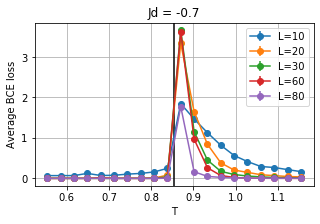

In [131]:
plt.errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='o', label='L=10')
plt.errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='o', label='L=20')
plt.errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='o', label='L=30')
plt.errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='o', label='L=60')
plt.errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='o', label='L=80')

plt.title('Jd = -0.7')
plt.xlabel('T')
plt.ylabel('Average BCE loss')
plt.axvline(x=T_c, color='black')
plt.legend()

plt.savefig('images/07_20_bce.png')

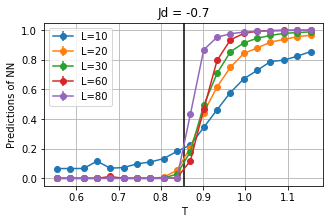

In [132]:
plt.errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='o', label='L=10')
plt.errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='o', label='L=20')
plt.errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='o', label='L=30')
plt.errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='o', label='L=60')
plt.errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='o', label='L=80')

plt.title('Jd = -0.7')
plt.xlabel('T')
plt.ylabel('Predictions of NN')
plt.axvline(x=T_c, color='black')
plt.legend()

plt.savefig('images/07_20_pred.png')

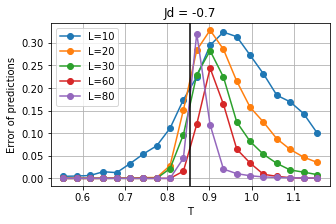

In [133]:
plt.plot(T, stds_err(outs_10), marker='o', label='L=10')
plt.plot(T, stds_err(outs_20), marker='o', label='L=20')
plt.plot(T, stds_err(outs_30), marker='o', label='L=30')
plt.plot(T, stds_err(outs_60), marker='o', label='L=60')
plt.plot(T, stds_err(outs_80), marker='o', label='L=80')

plt.title('Jd = -0.7')
plt.xlabel('T')
plt.ylabel('Error of predictions')
plt.axvline(x=T_c, color='black')
plt.legend()

plt.savefig('images/07_20_ep.png')

In [119]:
####### -0.9 ##########

In [134]:
Jd = -0.9

num_temps = 20
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_10 = np.load(f)
    
L = 20
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_80 = np.load(f)

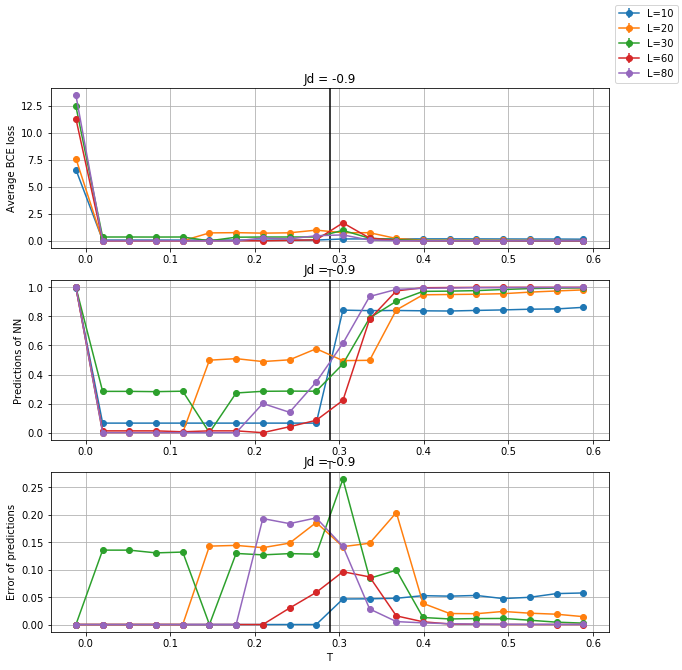

In [121]:
fig, ax = plt.subplots(3, 1, figsize=(10,10))

ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='o', label='L=10')
ax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='o', label='L=20')
ax[0].errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='o', label='L=30')
ax[0].errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='o', label='L=60')
ax[0].errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='o', label='L=80')

ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='o')
ax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='o')
ax[1].errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='o')
ax[1].errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='o')
ax[1].errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='o')

ax[2].plot(T, stds_err(outs_10), marker='o')
ax[2].plot(T, stds_err(outs_20), marker='o')
ax[2].plot(T, stds_err(outs_30), marker='o')
ax[2].plot(T, stds_err(outs_60), marker='o')
ax[2].plot(T, stds_err(outs_80), marker='o')

ax[0].axvline(x=T_c, color='black')
ax[1].axvline(x=T_c, color='black')
ax[2].axvline(x=T_c, color='black')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title='Jd = -0.9')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

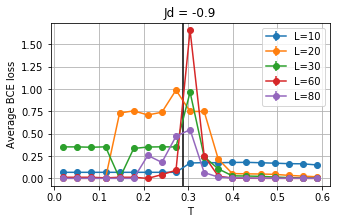

In [135]:
plt.errorbar(T[T>0], errs(errs_10)[T>0], yerr=stds_err(errs_10)[T>0]/1000, marker='o', label='L=10')
plt.errorbar(T[T>0], errs(errs_20)[T>0], yerr=stds_err(errs_20)[T>0]/1000, marker='o', label='L=20')
plt.errorbar(T[T>0], errs(errs_30)[T>0], yerr=stds_err(errs_30)[T>0]/1000, marker='o', label='L=30')
plt.errorbar(T[T>0], errs(errs_60)[T>0], yerr=stds_err(errs_60)[T>0]/1000, marker='o', label='L=60')
plt.errorbar(T[T>0], errs(errs_80)[T>0], yerr=stds_err(errs_80)[T>0]/1000, marker='o', label='L=80')

plt.title('Jd = -0.9')
plt.xlabel('T')
plt.ylabel('Average BCE loss')
plt.axvline(x=T_c, color='black')
plt.legend()

plt.savefig('images/09_20_bce.png')

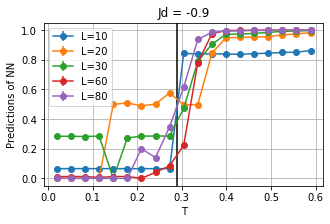

In [136]:
plt.errorbar(T[T>0], errs(outs_10)[T>0], yerr=stds_err(outs_10)[T>0]/1000, marker='o', label='L=10')
plt.errorbar(T[T>0], errs(outs_20)[T>0], yerr=stds_err(outs_20)[T>0]/1000, marker='o', label='L=20')
plt.errorbar(T[T>0], errs(outs_30)[T>0], yerr=stds_err(outs_30)[T>0]/1000, marker='o', label='L=30')
plt.errorbar(T[T>0], errs(outs_60)[T>0], yerr=stds_err(outs_60)[T>0]/1000, marker='o', label='L=60')
plt.errorbar(T[T>0], errs(outs_80)[T>0], yerr=stds_err(outs_80)[T>0]/1000, marker='o', label='L=80')

plt.title('Jd = -0.9')
plt.xlabel('T')
plt.ylabel('Predictions of NN')
plt.axvline(x=T_c, color='black')
plt.legend()

plt.savefig('images/09_20_pred.png')

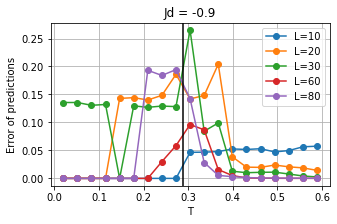

In [137]:
plt.plot(T[T>0], stds_err(outs_10)[T>0], marker='o', label='L=10')
plt.plot(T[T>0], stds_err(outs_20)[T>0], marker='o', label='L=20')
plt.plot(T[T>0], stds_err(outs_30)[T>0], marker='o', label='L=30')
plt.plot(T[T>0], stds_err(outs_60)[T>0], marker='o', label='L=60')
plt.plot(T[T>0], stds_err(outs_80)[T>0], marker='o', label='L=80')

plt.title('Jd = -0.9')
plt.xlabel('T')
plt.ylabel('Error of predictions')
plt.axvline(x=T_c, color='black')
plt.legend()

plt.savefig('images/09_20_ep.png')